<h1 dir="rtl" align="left">
Social Networks HW1 - University of Tehran - Fall 1404
</h1>


<div>
Name: Amir Hoseein Farazmand
<br/>
Student number : 810104221
</div>

# Question 3: The Evolution of Random Networks & Phase Transitions

# **Imports**

In [1]:
import matplotlib.pyplot as plt
import numpy as np


from Phase_Transitation import run_phase_transition_simulation
from Finite_Size_RN import run_finite_size_analysis
from Critical_State import analyze_critical_state

Simulation Started...
Network Size (N): 1000
Realizations per <k>: 50
Total steps: 67
  <k>    |    p       | no. of Components |    NG      |    S       |    <s>    
    0.00 |   0.000000 |            1000.0 |        1.0 |     0.0010 |     1.0000
    0.10 |   0.000100 |             950.1 |        3.4 |     0.0034 |     1.0501
    0.20 |   0.000200 |             899.4 |        4.9 |     0.0049 |     1.1079
    0.30 |   0.000300 |             849.7 |        6.3 |     0.0063 |     1.1709
    0.40 |   0.000400 |             798.2 |        8.9 |     0.0089 |     1.2436
    0.50 |   0.000501 |             752.3 |       11.3 |     0.0113 |     1.3165
    0.60 |   0.000601 |             702.7 |       15.2 |     0.0152 |     1.4043
    0.70 |   0.000701 |             651.3 |       21.5 |     0.0215 |     1.5058
    0.80 |   0.000801 |             597.8 |       34.6 |     0.0346 |     1.6189
    0.82 |   0.000821 |             593.1 |       35.0 |     0.0350 |     1.6311
    0.84 |   0.000841 |

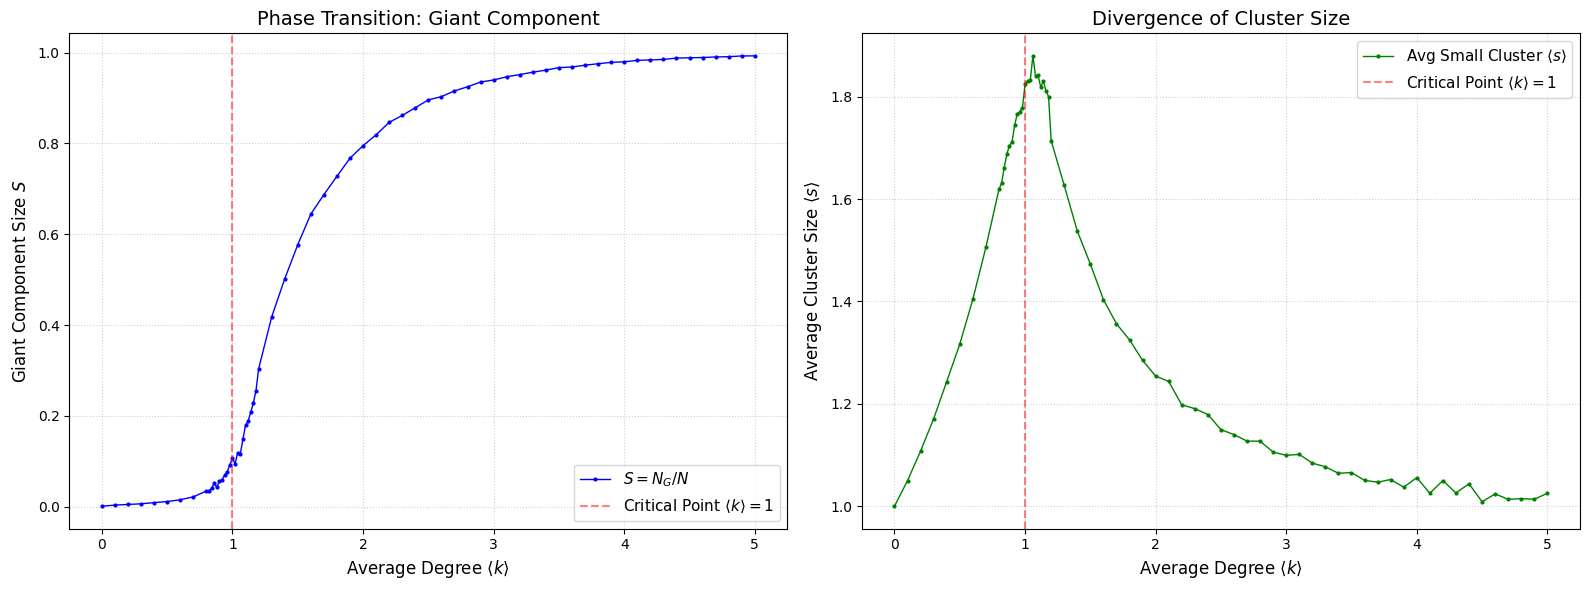

In [2]:
k_vals, S_vals, s_mean_vals = run_phase_transition_simulation()

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Parameter S vs <k>
ax1.plot(k_vals, S_vals, 'b.-', linewidth=1, markersize=4, label=r'$S = N_G/N$')
ax1.axvline(x=1.0, color='r', linestyle='--', alpha=0.5, label=r'Critical Point $\langle k \rangle = 1$')
ax1.set_xlabel(r'Average Degree $\langle k \rangle$', fontsize=12)
ax1.set_ylabel(r'Giant Component Size $S$', fontsize=12)
ax1.set_title('Phase Transition: Giant Component', fontsize=14)
ax1.legend(fontsize=11)
ax1.grid(True, linestyle=':', alpha=0.6)

# Plot 2: <s> vs <k>
ax2.plot(k_vals, s_mean_vals, 'g.-', linewidth=1, markersize=4, label=r'Avg Small Cluster $\langle s \rangle$')
ax2.axvline(x=1.0, color='r', linestyle='--', alpha=0.5, label=r'Critical Point $\langle k \rangle = 1$')
ax2.set_xlabel(r'Average Degree $\langle k \rangle$', fontsize=12)
ax2.set_ylabel(r'Average Cluster Size $\langle s \rangle$', fontsize=12)
ax2.set_title('Divergence of Cluster Size', fontsize=14)
ax2.legend(fontsize=11)
ax2.grid(True, linestyle=':', alpha=0.6)

plt.tight_layout()
plt.show()

### (b) Analysis of Critical Threshold and Phase Transition

**1. Identification of the Critical Point**
   **Observation:** The Order Parameter $S$ (blue plot) begins to rise significantly from zero around $\langle k \rangle \approx 1$.
   **Vs Theorical Prediction:** Plot results matches the theoretical prediction for random networks, where the critical threshold is exactly at $\langle k \rangle_c = 1$.
   
   **Finite-Size Effects:** The transition is not perfectly sharp (step-like) but rather smooth/curved around $\langle k \rangle = 1$. This occurs because our network size is finite ($N=1000$). In an infinite network ($N \to \infty$), the transition would be abrupt, but finite systems always show smoother transitions near the critical point.

**2. Divergence of Average Cluster Size ($\langle s \rangle$)**
The plot of $\langle s \rangle$ (green plot) shows a distinct peak near the critical point. The behavior can be explained this way:

   **Sub-critical Phase ($\langle k \rangle < 1$):** Initially, adding edges merges isolated nodes into small clusters. As clusters grow larger, the average size $\langle s \rangle$ increases.

   **The Peak (Critical Point):** Near $\langle k \rangle \approx 1$, the network contains many large trees and clusters just before they merge into a single giant component. The fluctuation in cluster sizes is maximized here, leading to the peak (divergence).

   **Super-critical Phase ($\langle k \rangle > 1$):** Once the threshold is crossed, the largest clusters merge to form the Giant Component. Since the calculation of $\langle s \rangle$ **excludes** the giant component, we are left averaging only the small, isolated clusters that failed to connect to the giant one. Consequently, the average size of the remaining clusters drops rapidly.

Finite Size Effect Simulation Started
Sizes to simulate: [100, 1000, 10000]
Realizations per point: 50

Processing N = 100... 
Processing N = 1000... 
Processing N = 10000... 

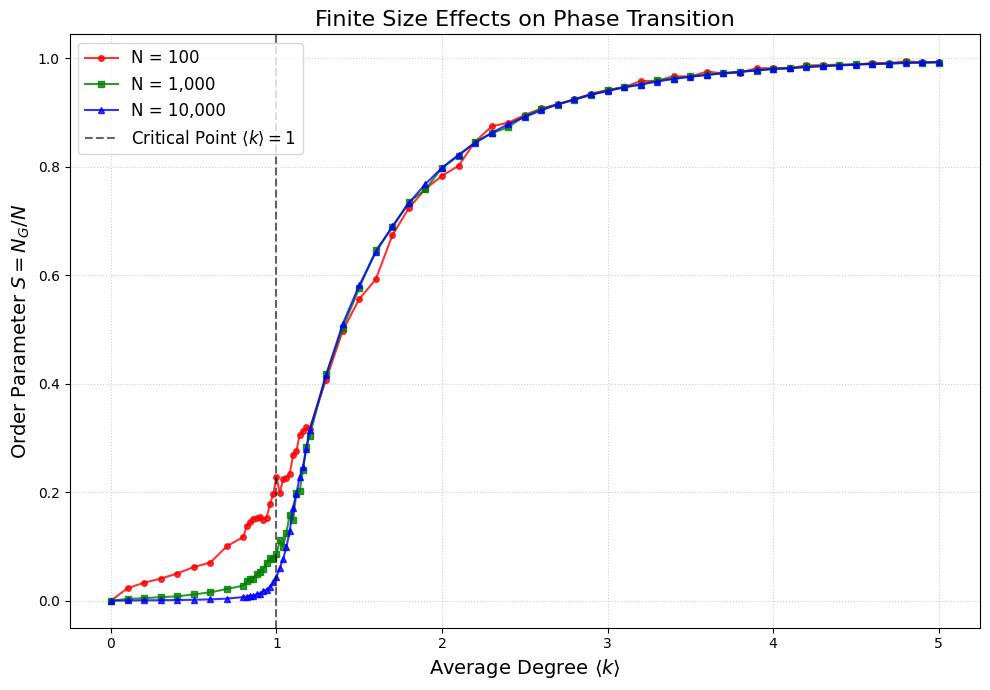

In [2]:
# Run Simulation for N = 100, 1000, 10000
results = run_finite_size_analysis(n_realizations=50)

# 2. Visualization
plt.figure(figsize=(10, 7))

styles = {
    100:   {'color': 'red',   'fmt': 'o-', 'label': 'N = 100'},
    1000:  {'color': 'green', 'fmt': 's-', 'label': 'N = 1,000'},
    10000: {'color': 'blue',  'fmt': '^-', 'label': 'N = 10,000'}
}

for N, data in results.items():
    plt.plot(data['k'], data['S'], 
             styles[N]['fmt'], 
             color=styles[N]['color'], 
             linewidth=1.5, 
             markersize=4, 
             alpha=0.8,
             label=styles[N]['label'])

# theoretical critical line
plt.axvline(x=1.0, color='black', linestyle='--', linewidth=1.5, alpha=0.6, label=r'Critical Point $\langle k \rangle = 1$')

plt.xlabel(r'Average Degree $\langle k \rangle$', fontsize=14)
plt.ylabel(r'Order Parameter $S = N_G/N$', fontsize=14)
plt.title(r'Finite Size Effects on Phase Transition', fontsize=16)
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, linestyle=':', alpha=0.6)

plt.tight_layout()
plt.show()

### (c) Finite Size Effects Analysis

**Implementation Note:**
For the simulation of larger networks (specifically $N=10,000$), we used nx.fast_gnp_random_graph function from the NetworkX library. This function is algorithmically equivalent to the standard Erdős-Rényi generator (G(n, p)) but is optimized for speed, ensuring efficient computation without altering the statistical properties of the generated graphs.

**1. Sharpness of the Transition**

*   **Small N ($N=100$, Red Line):** The transition is "smooth" and gradual. The order parameter $S$ starts to rise noticeably well before the critical point $\langle k \rangle = 1$, indicating strong finite-size effects.
*   **Large N ($N=10,000$, Blue Line):** The transition becomes much "sharper." The curve stays closer to zero until $\langle k \rangle \approx 1$ and then rises suddenly.
*   As $N$ increases, the slope of the curve near the critical point becomes steeper. This confirms that in the thermodynamic limit ($N \to \infty$), the phase transition becomes a sharp, non-continuous change, whereas, in finite systems, the transition is rather more smoothed.

**2. Behavior of S At the critical point $\langle k \rangle = 1$**:
*   **Observation:** As $N$ increases, the value of $S$ at $\langle k \rangle = 1$ decreases significantly. The red point ($N=100$) is relatively high, while the blue point ($N=10,000$) is very close to zero.
*   **Theoretical Relation:** According to percolation theory, at the critical point, the size of the giant component scales as $N_G \sim N^{2/3}$.
*   **Order Parameter Scaling:** Since the order parameter is defined as $S = N_G / N$, substituting the theoretical prediction gives:
    $ S \sim \frac{N^{2/3}}{N} = N^{-1/3} $
*   Since the exponent is negative ($-1/3$), as $N \to \infty$, $S$ tends towards zero. Our simulation results confirms this prediction, as the relative size of the giant component shrinks at the critical point for larger networks ($N=10,000$).

Largest component: 319
Estimated Alpha: 1.5422


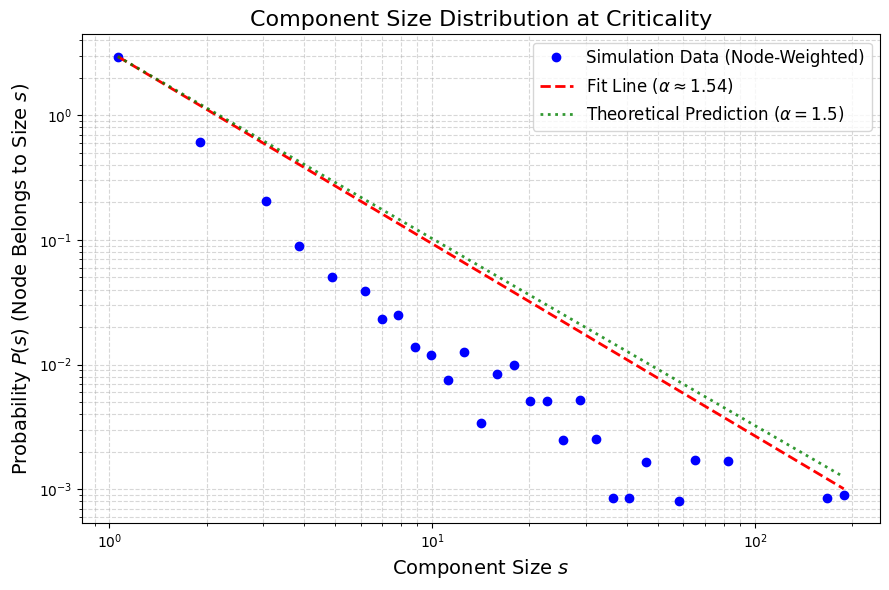

In [85]:

# 1. Run Analysis (You might want to increase N to 50,000 or 100,000 for a cleaner line if possible)
# With N=10,000 it will be a bit noisy but correct slope.
x, y, alpha = analyze_critical_state(N=10000, num_bins=50)

# 2. Visualization
plt.figure(figsize=(9, 6))

# Plot Data
plt.loglog(x, y, 'bo', label='Simulation Data (Node-Weighted)')

# Plot Fit
y_fit = x**(-alpha) * (y[0] / x[0]**(-alpha)) # Anchor to data
plt.plot(x, y_fit, 'r--', linewidth=2, label=f'Fit Line ($\\alpha \\approx {alpha:.2f}$)')

# Plot Theory (Slope 1.5)
y_theory = x**(-1.5) * (y[0] / x[0]**(-1.5))
plt.plot(x, y_theory, 'g:', linewidth=2, alpha=0.8, label=r'Theoretical Prediction ($\alpha = 1.5$)')

plt.xlabel(r'Component Size $s$', fontsize=14)
plt.ylabel(r'Probability $P(s)$ (Node Belongs to Size $s$)', fontsize=14)
plt.title(r'Component Size Distribution at Criticality', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, which="both", linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


### (d) The Critical State

**1. Power-Law Behavior and Exponent Estimation**
*   **Observation:** The plot of the component size distribution (the probability that a node belongs to a component of size $s$) on a Log-Log scale exhibits a roughly linear trend. This linearity confirms that the network structure at criticality follows a power-law distribution:
    $$ P(s) \sim s^{-\alpha} $$
*   Using linear regression on the log-binned data, the scaling exponent was estimated to be:
    $ \alpha \approx 1.54 $

**2. Comparison with Theoretical Prediction**
*   The estimated exponent ($\alpha \approx 1.54$) matchs with the theoretical prediction for random graphs at critical state ($\alpha= 1.5$).
*   **Analysis of the Fit:**
    *   The plot shows that the simulation data (blue dots) generally follows the slope of the theoretical line (green dotted line).
    *   The slight deviation of the data points falling below the fit line in the middle and tail sections is a characteristic **Finite-Size Effect**. In a network of size $N=10,000$, the maximum component size is limited (in this plot, max size = 319), which introduces an exponential cutoff in the distribution tail. This cutoff causes the probability of large clusters to be lower than what an infinite system would predict, causing the points to slightly differ from power-law line.
    *   Despite these finite-size constraints, the calculated slope (1.54) confirms and matchs with the theoretical prediction for random
graphs at criticality ($\alpha= 1.5$)